# Covid-19 Detection <br>Milestone 1
Brooks Christensen 

Due date: 23 Dec 2022

# Introduction

## Problem Context:
A new respiratory disease, whose first known case was documented in late November 2019, was
quickly traced to a novel coronavirus. The World Health Organization (WHO) characterized the
COVID-19, caused by the SARS-CoV-2, because the uncontrollable spread of the virus was declared
a pandemic on March 11th, while the exponential increase in the number of cases was risking to
overwhelm health systems around the world with a demand of hospitalization and for ICU beds far
above the existing capacity, with regions of Italy being prominent examples.
Brazil recorded the first case of SARS-CoV-2 on February 26th, and the virus transmission evolved
from the international people to local and finally to the community very rapidly, with the federal
government declaring nationwide community transmission on March 20th.
Until March 27th, the state of São Paulo had recorded 1,223 confirmed cases of COVID-19, with 68
related deaths, while the county of São Paulo, with a population of approximately 12 million people
and where Hospital Israelita Albert Einstein is located, had 477 confirmed cases and 30 associated
death, as of March 23rd. Both the state and the county of São Paulo decided to establish quarantine
and social distancing measures, which were enforced at least until early April, in an effort to slow the
virus's spread across the country & to minimize the number of hospitalizations with severity.
One of the motivations for this problem was the fact that in the context of an overwhelmed health
system with the possible limitation to performing tests for the detection of SARS-CoV-2, testing
every case with some mild symptoms like cold & cough or suffering from mild fever would be
impractical and test results could be delayed because of more number of people complaining about
mild symptoms & going for tests. So setting up criteria to get tested was very important to focus on
getting the test results early & also to reduce the spread of the virus quicker.

## Problem Statement:
Based on the laboratory tests collected from suspected cases, predict the chances of being positive or negative for covid19 and identify the factors that influence it. Also, provide the recommendations to the hospital on how they can better manage the admission of patients to the general ward, semi-intensive unit, or intensive care unit.

## Instructions
The first milestone report must describe the data and align it to the analytical problems the Capstone Project addresses. It should also include the rationale of the project - why is the problem important and what value it will add to the company.

The following points are expected to be included in the first milestone report:

- Introduction
- Define the problem statement
- Need of the present study
- Business/social opportunities
- Data Report
- Understand the data collection methodology - comment on how the data might have been collected
- Overview of data - check the rows, columns, variable info, and descriptive details
- Initial Exploratory Data Analysis
- Univariate Analysis - distribution and spread for continuous and categorical variables
- Bivariate Analysis - relationships between different variables

## Need of the Present Study
The need of the present study is clear because, assuming we are supposed to be receiving the data as if it were in real time at the start of the pandemic, many lives are potentially at stake. Any pressure that we can take off of hospital staff, especially in making triage decisions, is a worthwhile effort. Such a technology would also be valuable as a business asset for other hospitals or medical facilities.

## Business / Social Opportunities
Any company capable of producing such a technology would be interested in the problem because the product could be monetized when working with different hospital facilities for deployment in real-world environments; however, given the nature of the international crisis and the desire to preserve as much human life as possible, I would recommend the business offer the product to the public immediately and instead of profit reward for the business attempt to realize a social reward somehow. The company could use the positive press to generate future business opportunities or open new options in social media circles. I don't have much experience with business or social media, so I can't make any recommendations beyond that.

## About the Dataset: 
This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, in São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital. 

All the data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation.

## Data Description:
- No description beyond column names is provided for 111 features

# Import Dependencies

In [1]:
# # in case pandas ProfileReport is used - update - there are too many features to run in a reasonable time
# ! pip install --upgrade pandas-profiling
# !pip install imbalanced-learn

In [2]:
# basic packages
import numpy as np, pandas as pd
import time

# for plotting / visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for scaling during data cleaning
from sklearn.preprocessing import StandardScaler

# for univariate analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# for bivariate analysis
from scipy.stats import pearsonr, spearmanr
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import chi2_contingency

# for resampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# for summarizing the data in a convenient package call
# from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'statsmodels'

# Define Reporting Functions

In [ ]:
# reports overall run time
def run_time_reporter(start_time):
    runtime1 = time.time() - start_time
    mins1 = int(runtime1/60.%60.)
    secs1 = runtime1%60. 
    if mins1 == 0:
        print("Run time: {:.1f} s".format(secs1))
    else:
        print("Run time: {:d} mins, {:.1f} s".format(mins1, secs1))

In [ ]:
start_time = time.time()

In [ ]:
# for categorical class count reporting
def cat_class_reporter(df, cat_cols, normalize = True):
    for col in df[cat_cols].drop(columns = ['Patient ID']):
        counts = df[col].value_counts(normalize = normalize)
        if normalize:
            counts *= 100
        print(counts)
        print('*' * 100)

In [ ]:
# displays boxplots of numerical features
def outlier_vizualizer(df, num_cols):
    fig = plt.figure(figsize = (20,10))
    sns.boxplot(df)
    plt.xticks(rotation = 90)
    plt.title('Outliers in Numerical Features', fontsize = 32)
    plt.show()

In [ ]:
# reports distribution of numerical features
def univariate_plotter(df):
    sns.histplot(df, kde=True)
    plt.show()

In [ ]:
# reports on dependencies of categorical columns
def cat_dependencies(df_cat, col1, col2):
    pivot_tmp = pd.pivot_table(df_cat, values='ones', index=[col1], columns=[col2], aggfunc='sum')
    # sns.heatmap(pivot_tmp, annot=True)
    # plt.show()
    # print(col1, col2)
    stat, p, dof, expected = chi2_contingency(pivot_tmp)
    if p <= 0.05:
        print(f'Reject H0: {col1} and {col2} are dependent')
    # else:
        # print('H0 holds true: {} are independent.'.format(col1+' and '+col2))

# Import Data

In [ ]:
# univariate_plotter(X_encoded)

In [ ]:
with open('covid19_dataset.csv', 'r') as input_filename:
    df = pd.read_csv(input_filename)
    
df0 = df.copy(deep=True)

# Data Report / Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [ ]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

**Observations:** 
- There are 111 features total
    - 74 are numerical
    - 37 are categorical
- There are 5644 observations
- The `Patient age quantile` variable is not standardized like the rest of the variables
- There may be many missing values if this is a representative sample of the data

### Numerical Features

In [ ]:
print(len(df.describe().T))

74


In [ ]:
df.describe().T.sort_values('count', ascending=False).head(40)

count          mean  \
Patient age quantile                                5644.0  9.318391e+00   
Patient addmited to semi-intensive unit (1=yes,...  5644.0  8.858965e-03   
Patient addmited to intensive care unit (1=yes,...  5644.0  7.264352e-03   
Patient addmited to regular ward (1=yes, 0=no)      5644.0  1.399717e-02   
Hematocrit                                           603.0 -2.187396e-09   
Hemoglobin                                           603.0 -1.598342e-08   
Leukocytes                                           602.0  6.218887e-09   
Red blood cell distribution width (RDW)              602.0  1.020598e-08   
Mean corpuscular volume (MCV)                        602.0 -4.149502e-09   
Eosinophils                                          602.0  7.146179e-09   
Basophils                                            602.0 -6.594684e-09   
Mean corpuscular hemoglobin (MCH)                    602.0 -3.378738e-09   
Mean corpuscular hemoglobin concentration (MCHC)     602.0  9.784053e-10   
Lymphocytes                                          602.0 -7.863787e-09   
Red blood Cells                                      602.0  8.416944e-09   
Platelets                                            602.0 -3.820598e-10   
Monocytes                                            601.0 -3.269551e-09   
Mean platelet volume                                 599.0  7.373957e-09   
Neutrophils                                          513.0  5.890838e-09   
Proteina C reativa mg/dL                             506.0  2.760870e-09   
Creatinine                                           424.0 -6.669811e-09   
Urea                                                 397.0 -6.707809e-09   
Potassium                                            371.0  2.053100e-08   
Sodium                                               370.0  1.105946e-08   
Aspartate transaminase                               226.0 -5.265486e-10   
Alanine transaminase                                 225.0  2.742222e-09   
Serum Glucose                                        208.0  7.067308e-09   
Total Bilirubin                                      182.0 -2.626374e-09   
Direct Bilirubin                                     182.0  1.206044e-08   
Indirect Bilirubin                                   182.0  3.170330e-09   
Gamma-glutamyltransferase                            153.0 -1.535948e-09   
Alkaline phosphatase                                 144.0 -2.048611e-09   
HCO3 (venous blood gas analysis)                     136.0 -4.463235e-09   
pH (venous blood gas analysis)                       136.0  3.617647e-09   
Total CO2 (venous blood gas analysis)                136.0 -9.139706e-09   
pO2 (venous blood gas analysis)                      136.0 -7.933824e-09   
Base excess (venous blood gas analysis)              136.0 -1.058824e-09   
Hb saturation (venous blood gas analysis)            136.0  1.508088e-08   
pCO2 (venous blood gas analysis)                     136.0 -1.935294e-08   
International normalized ratio (INR)                 133.0 -4.774436e-09   

                                                         std       min  \
Patient age quantile                                5.777903  0.000000   
Patient addmited to semi-intensive unit (1=yes,...  0.093713  0.000000   
Patient addmited to intensive care unit (1=yes,...  0.084929  0.000000   
Patient addmited to regular ward (1=yes, 0=no)      0.117489  0.000000   
Hematocrit                                          1.000830 -4.501420   
Hemoglobin                                          1.000830 -4.345603   
Leukocytes                                          1.000832 -2.020303   
Red blood cell distribution width (RDW)             1.000832 -1.598094   
Mean corpuscular volume (MCV)                       1.000832 -5.101581   
Eosinophils                                         1.000832 -0.835508   
Basophils                                           1.000832 -1.140144   
Mean corpuscular hemoglobin (MCH)               

In [ ]:
df.describe().T.sort_values('count', ascending=False).tail(34)

count          mean       std  \
Creatine phosphokinase (CPK)               104.0 -6.471154e-09  1.004843   
Lactic Dehydrogenase                       101.0  1.752475e-09  1.004988   
Rods #                                      97.0  2.793814e-09  1.005195   
Segmented                                   97.0 -2.670103e-08  1.005195   
Promyelocytes                               97.0  7.257732e-09  1.005195   
Metamyelocytes                              97.0  8.453608e-09  1.005195   
Myelocytes                                  97.0  1.410309e-08  1.005195   
Myeloblasts                                 97.0  0.000000e+00  0.000000   
Relationship (Patient/Normal)               91.0 -9.230769e-10  1.005540   
Urine - Density                             70.0 -2.585714e-09  1.007220   
Urine - Red blood cells                     70.0  7.585714e-09  1.007220   
Ionized calcium                             50.0  1.914000e-08  1.010153   
Magnesium                                   40.0 -5.225000e-09  1.012739   
Base excess (arterial blood gas analysis)   27.0 -1.703704e-09  1.019049   
pCO2 (arterial blood gas analysis)          27.0  8.370370e-09  1.019049   
Hb saturation (arterial blood gases)        27.0 -1.851852e-10  1.019049   
HCO3 (arterial blood gas analysis)          27.0  6.000000e-09  1.019049   
Arterial Lactic Acid                        27.0 -1.370370e-09  1.019049   
ctO2 (arterial blood gas analysis)          27.0  5.185185e-09  1.019049   
pO2 (arterial blood gas analysis)           27.0 -2.481481e-08  1.019049   
Total CO2 (arterial blood gas analysis)     27.0 -7.444444e-09  1.019049   
pH (arterial blood gas analysis)            27.0  3.333333e-10  1.019049   
Ferritin                                    23.0  7.260870e-09  1.022475   
Arteiral Fio2                               20.0  4.650000e-09  1.025978   
Phosphor                                    20.0  6.250000e-09  1.025978   
Albumin                                     13.0 -5.769231e-09  1.040833   
Lipase dosage                                8.0 -3.875000e-09  1.069045   
Vitamin B12                                  3.0 -2.000000e-08  1.224745   
Fio2 (venous blood gas analysis)             1.0  0.000000e+00       NaN   
D-Dimer                                      0.0           NaN       NaN   
Prothrombin time (PT), Activity              0.0           NaN       NaN   
Partial thromboplastin time (PTT)            0.0           NaN       NaN   
Urine - Sugar                                0.0           NaN       NaN   
Mycoplasma pneumoniae                        0.0           NaN       NaN   

                                                min       25%       50%  \
Creatine phosphokinase (CPK)              -0.515714 -0.376967 -0.224750   
Lactic Dehydrogenase                      -1.358584 -0.699774 -0.330840   
Rods #                                    -0.624373 -0.624373 -0.624373   
Segmented                                 -2.264253 -0.672828  0.175932   
Promyelocytes                             -0.102062 -0.102062 -0.102062   
Metamyelocytes                            -0.315965 -0.315965 -0.315965   
Myelocytes                                -0.233126 -0.233126 -0.233126   
Myeloblasts                                0.000000  0.000000  0.000000   
Relationship (Patient/Normal)             -2.351347 -0.496616 -0.089481   
Urine - Density                           -1.757493 -0.764215 -0.054732   
Urine - Red blood cells                   -0.202297 -0.202297 -0.193921   
Ionized calcium                           -2.099957 -0.729337  0.059810   
Magnesium                                 -2.191136 -0.557991 -0.013609   
Base excess (arterial blood gas analysis) -3.082674 -0.330867 -0.011817   
pCO2 (arterial blood gas analysis)        -1.244817 -0.534810 -0.212080   
Hb saturation (arterial blood gases)      -1.999560 -1.122574  0.267769   
HCO3 (arterial blood gas analysis)        -2.985592 -0.539721  0.056332   
Arterial Lactic Acid            

In [ ]:
count_vcs = df.describe().T.value_counts('count').astype(int)
pd.DataFrame(count_vcs, columns = ['# of features']) # head(len(count_vcs))

# of features
count                
602.0              10
27.0                9
136.0               7
97.0                6
0.0                 5
5644.0              4
182.0               3
603.0               2
70.0                2
20.0                2
23.0                1
226.0               1
3.0                 1
601.0               1
599.0               1
513.0               1
506.0               1
424.0               1
397.0               1
371.0               1
370.0               1
208.0               1
225.0               1
153.0               1
1.0                 1
8.0                 1
133.0               1
104.0               1
101.0               1
13.0                1
91.0                1
50.0                1
40.0                1
144.0               1

In [1]:
df.isna().sum().T

NameError: name 'df' is not defined

**Observations:** 
- There are many missing data elements in the dataframe!
- There are some columns with no entries at all:
    - `Mycoplasma pneumoniae`
    - `Urine - Sugar`
    - `Partial thromboplastin time (PTT)`
    - `Prothrombin time (PT), Activity`
    - `D-Dimer`
- `Fio2 (venous blood gas analysis)` only has one count
- `Vitamin B12` and `Lipase Dosage` also have less than 10 counts.
- Some features have no missing elements:
    - `Patient age quantile`
    - `Patient addmited to semi-intensive unit (1=yes, 0=no)`
    - `Patient addmited to intensive care unit (1=yes, 0=no)`	
    - `Patient addmited to regular ward (1=yes, 0=no)`
- Most features are missing most of the elements!

In [17]:
drop_cols = ['Mycoplasma pneumoniae', 'Urine - Sugar', 'Partial thromboplastin time\xa0(PTT)\xa0', 'Prothrombin time (PT), Activity', 'D-Dimer']

### Categorical Features

#### Get Class Count for each Categorical Feature

In [18]:
num_cols = list(df.describe().columns)
cat_cols = list(set(df.columns) - set(num_cols))
cat_class_nums = np.array([len(df[x].value_counts()) for x in cat_cols])

# for i, col in enumerate(cat_cols):
#     print(f"{col}: \n\t{cat_class_nums[i]} classes")
pd.DataFrame({'# of classes': cat_class_nums}, index = cat_cols).sort_values('# of classes')

# of classes
Urine - Yeasts                          1
Urine - Nitrite                         1
Parainfluenza 2                         1
Urine - Hyaline cylinders               1
Urine - Granular cylinders              1
Rhinovirus/Enterovirus                  2
Influenza B                             2
Parainfluenza 4                         2
Influenza A, rapid test                 2
CoronavirusOC43                         2
Urine - Bile pigments                   2
Influenza B, rapid test                 2
Bordetella pertussis                    2
Urine - Protein                         2
Respiratory Syncytial Virus             2
Adenovirus                              2
Urine - Urobilinogen                    2
Urine - Esterase                        2
Inf A H1N1 2009                         2
CoronavirusNL63                         2
Urine - Ketone Bodies                   2
Metapneumovirus                         2
Parainfluenza 3                         2
Coronavirus229E                         2
SARS-Cov-2 exam result                  2
Parainfluenza 1                         2
Coronavirus HKU1                        2
Influenza A                             2
Chlamydophila pneumoniae                2
Strepto A                               3
Urine - Hemoglobin                      3
Urine - Color                           4
Urine - Aspect                          4
Urine - Crystals                        5
Urine - pH                             11
Urine - Leukocytes                     31
Patient ID                           5644

In [19]:
pd.DataFrame({'# of classes': cat_class_nums}, index = cat_cols).value_counts()

# of classes
2               24
1                5
3                2
4                2
5                1
11               1
31               1
5644             1
dtype: int64

#### Distribution of Number of Classes for Categorial Features

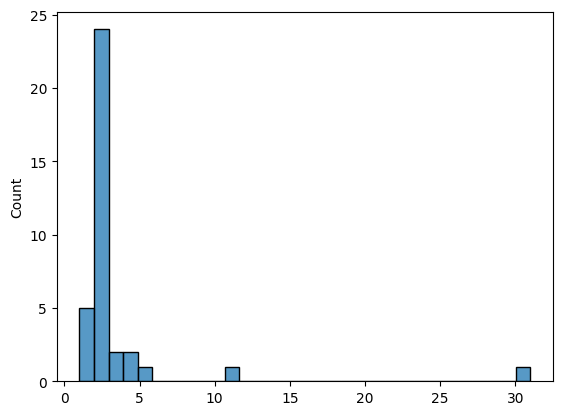

In [20]:
sns.histplot(cat_class_nums[cat_class_nums < 1000], bins = 31)
plt.show()

In [21]:
print(f"The number of categorical features with more than 31 classes is: {len(cat_class_nums[cat_class_nums > 31])}")
print(f"This feature is '{cat_cols[np.where(cat_class_nums == max(cat_class_nums))[0][0]]}' and has {max(cat_class_nums)} classes")

The number of categorical features with more than 31 classes is: 1
This feature is 'Patient ID' and has 5644 classes


#### Print Value Counts for Feature with 31 Classes

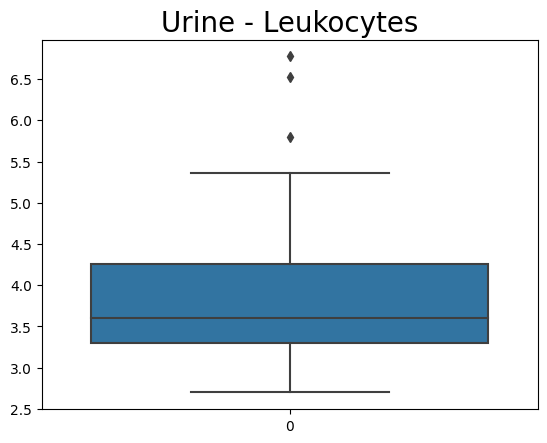

Urine - Leukocytes
2.698970              9
3.000000              4
3.301030              7
3.397940              1
3.414973              1
3.477121              9
3.602060              7
3.662758              1
3.698970              2
3.724276              1
3.778151              1
3.845098              2
3.903090              3
4.000000              2
4.025306              1
4.204120              1
4.278754              1
4.342423              2
4.361728              1
4.447158              1
4.462398              2
4.505150              1
4.579784              2
4.602060              1
4.633468              1
4.886491              1
5.093422              1
5.359835              1
5.795185              1
6.519828              1
6.773933              1
dtype: int64

In [22]:
# df[df['Urine - Leukocytes'] == '<1000'].loc[:,'Urine - Leukocytes'] = 500
df = df.replace({'Urine - Leukocytes': {'<1000': 500}})

# take base-10 log of variable
sns.boxplot(np.log10(np.array(df['Urine - Leukocytes'].dropna().astype(int))))
plt.title('Urine - Leukocytes', fontsize = 20)
plt.show()

pd.DataFrame(np.log10(np.array(df['Urine - Leukocytes'].dropna().astype(float))), columns = ['Urine - Leukocytes']).value_counts().sort_index() 

In [23]:
pd.DataFrame({'# of classes': cat_class_nums}, index = cat_cols).value_counts()

# of classes
2               24
1                5
3                2
4                2
5                1
11               1
31               1
5644             1
dtype: int64

**Observations:**
- There are 24 binary variables
    - Binary features can be encoded with one hot encoding 
- The Patient IDs can be dropped since they are unique

## Understanding Data Collection Methodology
There are six columns that have no missing data, namely:
- Patient ID
- Patient age quantile
- SARS-Cov-2 exam result
- Patient addmited to regular ward (1=yes, 0=no)
- Patient addmited to semi-intensive unit (1=yes, 0=no)
- Patient addmited to intensive care unit (1=yes, 0=no)

These features are likely automatically collected somehow since there are no missing values.

Apart from those six features, there are many missing elements in the dataset; however, when the data is present it appears in batches for the same patient, but only for groups of features.

This would indicate to me that the data comes from different medical tests that can be ordered. It is clear that some data are explicitly collected through urinalysis, blood or blood gas analyses, and there are likely other types of medical analyses used to collect data for more unusual situations.

The data appears to include information on body chemistry and tests for other illnesses, likely to exclude them from a list of other possible diagnoses.

Since I do not have a basic medical training, I cannot speculate beyond this. 

# Initial Data Cleanup

## Remove Duplicate or Irrelevant Observations

In [24]:
print(sum(df.duplicated()))

0


## Filter Unwanted Outliers or Mistakes

In [25]:
# remove mistake outliers
df = df[df['Patient age quantile'] < 100]

## Fix Categorical Columns that should be Numerical

### Patient Age Quantile

In [26]:
# fix scaling in 'Patient age quantile' column
scaler = StandardScaler()
df['Patient age quantile'] = scaler.fit_transform(df[['Patient age quantile']]).flatten()

### Urine - Leukocytes

In [27]:
num_cols.append('Urine - Leukocytes')
cat_cols.remove('Urine - Leukocytes')

In [28]:
log_urine = pd.DataFrame(np.log(np.array(df['Urine - Leukocytes'].astype(float))), columns = ['Urine - Leukocytes'])

digit_urine = np.digitize(log_urine, [7,8,9,10]).astype(float)
digit_urine[np.isnan(log_urine)] = np.nan

scaled_urine = scaler.fit_transform(digit_urine).flatten()

df['Urine - Leukocytes'] = scaled_urine
df['Urine - Leukocytes'].value_counts()

-0.021134    26
 1.458217    15
-1.500484    13
-0.760809     9
 0.718542     7
Name: Urine - Leukocytes, dtype: int64

### Urine - pH

In [29]:
num_cols.append('Urine - pH')
cat_cols.remove('Urine - pH')

In [30]:
df = df.replace({'Urine - pH': {'Não Realizado': np.nan}}).astype({'Urine - pH': float})
df['Urine - pH'] = scaler.fit_transform(df[['Urine - pH']]).flatten()

In [31]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5644 entries, 0 to 5643
Data columns (total 111 columns):
 #    Column                                                 Dtype  
---   ------                                                 -----  
 0    Patient ID                                             object 
 1    Patient age quantile                                   float64
 2    SARS-Cov-2 exam result                                 object 
 3    Patient addmited to regular ward (1=yes, 0=no)         int64  
 4    Patient addmited to semi-intensive unit (1=yes, 0=no)  int64  
 5    Patient addmited to intensive care unit (1=yes, 0=no)  int64  
 6    Hematocrit                                             float64
 7    Hemoglobin                                             float64
 8    Platelets                                              float64
 9    Mean platelet volume                                   float64
 10   Red blood Cells                                        flo

# EDA

## Univariate Analysis

### Categorical Class Information

In [32]:
cat_class_reporter(df, sorted(cat_cols), normalize = False)

not_detected    1339
detected          13
Name: Adenovirus, dtype: int64
****************************************************************************************************
not_detected    1350
detected           2
Name: Bordetella pertussis, dtype: int64
****************************************************************************************************
not_detected    1343
detected           9
Name: Chlamydophila pneumoniae, dtype: int64
****************************************************************************************************
not_detected    1332
detected          20
Name: Coronavirus HKU1, dtype: int64
****************************************************************************************************
not_detected    1343
detected           9
Name: Coronavirus229E, dtype: int64
****************************************************************************************************
not_detected    1307
detected          45
Name: CoronavirusNL63, dtype: int64
*****************

**Observations:** 
- There are no ordinal features, except maybe `Urine - pH` 
    - The `Não Realizado` class does not have a defined place in the ordering of classes 
        - There is only one count for that class, maybe the observation can be dropped
- The other categorical features can be one hot encoded
- There are 7 features where a single observation was recorded as 'not_done' 
    - Several of these may be from the same observation
    - Six observations are from patient with index 177
    - The final observation ('Strepto A' feature) is from patient with index 2680
    - All entries could be converted to np.nan without critical loss of information
- Many features only contain one class (apart from 'not_done'), which would normally immediately indicate to drop the feature
    - In this case, there are many missing elements in the dataset
        - simply knowing which elements are present may provide some important information
    - These features are:
        1. Urine - Nitrite (this can be dropped as the only non-empty entry is 'not_done', and there is only one observation with this value)
        2. Urine - Granular cylinders
        3. Urine - Bile pigments
        4. Urine - Hyaline cylinders
        5. Urine - Protein
        6. Urine - Yeasts
        7. Urine - Esterase
        8. Urine - Ketone Bodies
        9. Urine - Urobilinogen

In [33]:
df.replace('not_done', np.nan, inplace = True)

### Numerical Feature Information

In [34]:
print(len(num_cols))

76


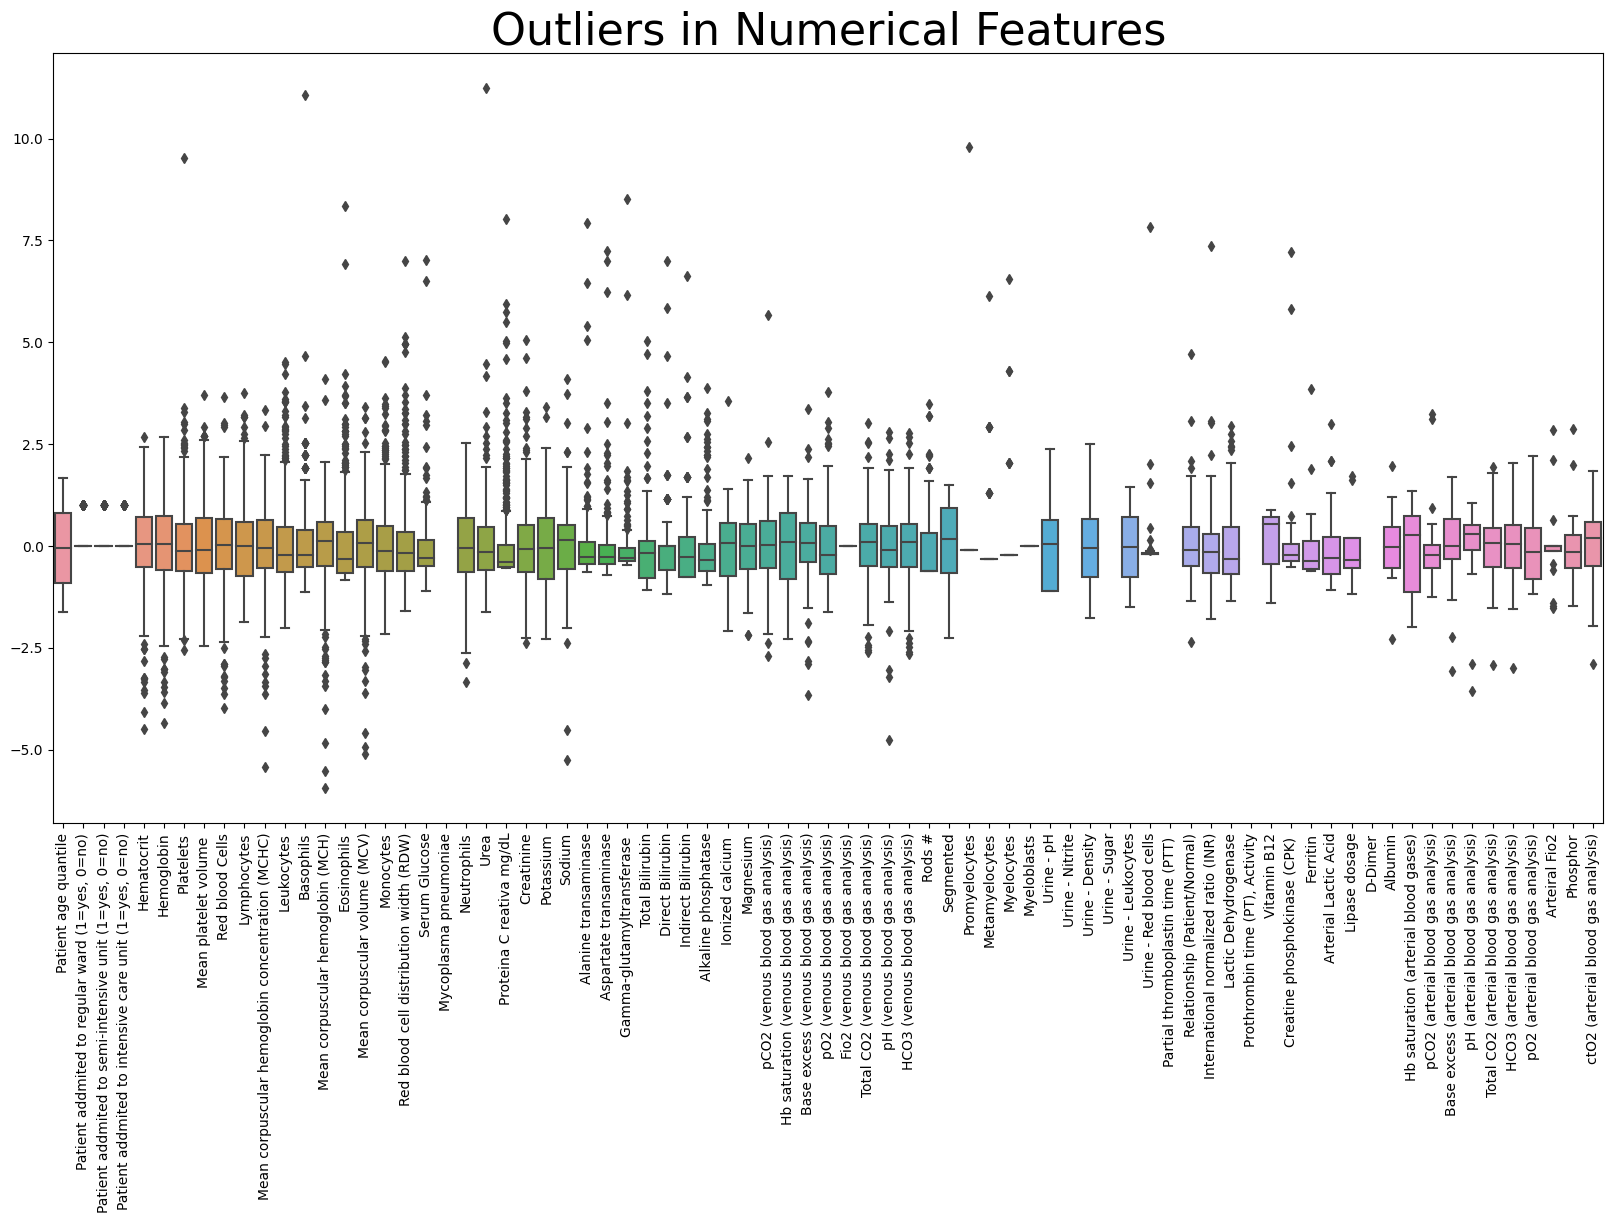

In [35]:
outlier_vizualizer(df, num_cols)

**Observations:** 
- The features have all been corrected so that the numerical values truly are standardized
- There are many outliers, but without an understanding of medicine it is impossible to tell if there are any other outliers that could be mistakes
- Most of the variables are nearly Gaussian distributed, but there are some exceptions:
    - Clearly more people were not admitted to any level of care than were admitted
    - Some features exhibit strong skew, such as `Gamma-glutamyltransferase` 
    - Some features exhibit strong non-zero kurtosis, such as `Red blood Cells` and `Mean corpuscular colume (MCV)`), as evidenced by outliers on both ends of the spectrum

## Relative Feature Importance Comparison

### Encode Categorical Variables

In [36]:
# Define the target variable
target = 'SARS-Cov-2 exam result'

# Split the data into features and target
X = df.drop(columns = [target, 'Patient ID'], axis=1)
y = df[target]

# Encode the categorical features as numerical values
X_encoded = pd.get_dummies(X, drop_first = True)

print(f"# of features after encoding: {len(X_encoded.columns)}")

# of features after encoding: 107


### Understand Missing Data

In [37]:
missing_nums = [sum(X_encoded[x].isna()) for x in X_encoded.columns]
missing_df = pd.DataFrame({'missing_nums': missing_nums}, index = X_encoded.columns)
missing_df.describe()

missing_nums
count    107.000000
mean    3708.785047
std     2549.686281
min        0.000000
25%        0.000000
50%     5274.000000
75%     5574.000000
max     5644.000000

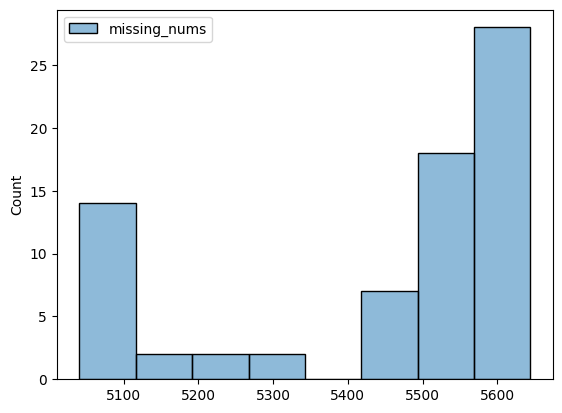

In [38]:
sns.histplot(missing_df[missing_df['missing_nums'] > 0])
plt.show()

In [39]:
missing_df.value_counts().sort_index().head(10)

missing_nums
0               34
5041             2
5042            10
5043             1
5045             1
5131             1
5138             1
5220             1
5247             1
5273             1
dtype: int64

In [40]:
# print names of features with no missing values
for x in missing_df.index[np.where(missing_df['missing_nums'] == 0)[0]].to_list():
    print(x)

Patient age quantile
Patient addmited to regular ward (1=yes, 0=no)
Patient addmited to semi-intensive unit (1=yes, 0=no)
Patient addmited to intensive care unit (1=yes, 0=no)
Respiratory Syncytial Virus_not_detected
Influenza A_not_detected
Influenza B_not_detected
Parainfluenza 1_not_detected
CoronavirusNL63_not_detected
Rhinovirus/Enterovirus_not_detected
Coronavirus HKU1_not_detected
Parainfluenza 3_not_detected
Chlamydophila pneumoniae_not_detected
Adenovirus_not_detected
Parainfluenza 4_not_detected
Coronavirus229E_not_detected
CoronavirusOC43_not_detected
Inf A H1N1 2009_not_detected
Bordetella pertussis_not_detected
Metapneumovirus_not_detected
Influenza B, rapid test_positive
Influenza A, rapid test_positive
Strepto A_positive
Urine - Aspect_clear
Urine - Aspect_cloudy
Urine - Aspect_lightly_cloudy
Urine - Hemoglobin_present
Urine - Crystals_Oxalato de Cálcio +++
Urine - Crystals_Oxalato de Cálcio -++
Urine - Crystals_Urato Amorfo +++
Urine - Crystals_Urato Amorfo --+
Urine - 

In [83]:
X_encoded.head()

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
0              0.637244                                               0   
1              1.329598                                               0   
2             -0.228198                                               0   
3             -0.747464                                               0   
4              0.983421                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   ...  Urine - Aspect_cloudy  Urine - Aspect_lightly_cloudy  \
0  ...                      0                              0   
1  ...                      0                              0   
2  ...                      0                              0   
3  ...                      0                              0   
4  ...                      0                              0   

   Urine - Hemoglobin_present  Urine - Crystals_Oxalato de Cálcio +++  \
0                           0                                       0   
1                           0                                       0   
2                           0                                       0   
3                           0                                       0   
4                           0                                       0   

   Urine - Crystals_Oxalato de Cálcio -++  Urine - Crystals_Urato Amorfo +++  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   Urine - Crystals_Urato Amorfo --+  Urine - Color_light_yellow  \
0                                  0                           0   
1                                  0                           0   
2                                  0                           0   
3                                  0                           0   
4                                  0                           0   

   Urine - Color_orange  Urine - Color_yellow  
0                     0                     0  
1                     0                     0  
2                     0                     0  
3                     0                     0  
4                     0                     0  

[5 rows x 97 columns]

In [41]:
missing_df.value_counts().sort_index().tail(10)

missing_nums
5594            1
5604            1
5617            9
5621            1
5624            2
5631            1
5636            1
5641            1
5643            1
5644            6
dtype: int64

In [42]:
# print names of features with the most missing observations
for x in missing_df.index[np.where(missing_df['missing_nums'] == max(missing_df['missing_nums']))[0]].to_list():
    print(x)

Mycoplasma pneumoniae
Urine - Nitrite
Urine - Sugar
Partial thromboplastin time (PTT) 
Prothrombin time (PT), Activity
D-Dimer


In [43]:
# report overall fraction of missing data
# test = df.drop(columns = missing_df.index[np.where(missing_df['missing_nums'] == 0)[0]].to_list()).dropna(how = 'all')
# print(len(test), len(df))
df_total = len(X_encoded.columns) * len(X_encoded)
# test_total = len(test) * len(test.columns)
# print(sum(df.isna().values))
df_missing_num = sum(sum(df.isna().values))
# test_missing_num = sum(sum(test.isna().values))
print(f"{df_missing_num} / {df_total} = {df_missing_num / df_total * 100} %") #  \n{test_missing_num} / {test_total} = {test_missing_num / test_total * 100} %")

551691 / 603908 = 91.35348430555648 %


In [44]:
# Impute the missing values
# imputer = SimpleImputer(strategy = 'median')
# X_imputed = imputer.fit_transform(X_encoded)
knn_imputer = KNNImputer()
X_imputed = knn_imputer.fit_transform(X_encoded)

### Get Relative Feature Importances

In [45]:
# Train a random forest classifier
clf = RandomForestClassifier() # HistGradientBoostingClassifier() #
clf.fit(X_imputed, y)

# Get the feature importances
importances = clf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

In [46]:
# Print the feature ranking
print("Feature ranking:")
for f in range(len(indices)):
    print(f"{f + 1}. {X_encoded.columns[indices[f]]}: {importances[indices[f]]}")

Feature ranking:
1. Leukocytes: 0.06600557186621582
2. Patient addmited to regular ward (1=yes, 0=no): 0.04412418529827399
3. Platelets: 0.03690939886546712
4. Patient age quantile: 0.023276340915938536
5. Monocytes: 0.022463447819644863
6. Eosinophils: 0.020981360851374174
7. International normalized ratio (INR): 0.02047467528065876
8. Indirect Bilirubin: 0.01989221258133251
9. Relationship (Patient/Normal): 0.01962811523135089
10. Hematocrit: 0.019022124405441633
11. Proteina C reativa mg/dL: 0.01899577669630868
12. Red blood Cells: 0.018599009566271963
13. Creatine phosphokinase (CPK) : 0.018548587222304895
14. Hb saturation (arterial blood gases): 0.017572813878980582
15. Alkaline phosphatase: 0.017242849976914835
16. Total CO2 (venous blood gas analysis): 0.01678227481355947
17. Lymphocytes: 0.016733875755863145
18. Urea: 0.016388629635673006
19. Urine - pH: 0.015741747240396765
20. Lactic Dehydrogenase: 0.015442642570844494
21. Hemoglobin: 0.015294749617351465
22. Mean corpuscula

**Observations:**
- There are 1041 features considered in the analysis
- According to the results of this analysis, the top 10 most important features and their relative importance scores are:
    1. Leukocytes: 0.06600557186621582
    2. Patient addmited to regular ward (1=yes, 0=no): 0.04412418529827399
    3. Platelets: 0.03690939886546712
    4. Patient age quantile: 0.023276340915938536
    5. Monocytes: 0.022463447819644863
    6. Eosinophils: 0.020981360851374174
    7. International normalized ratio (INR): 0.02047467528065876
    8. Indirect Bilirubin: 0.01989221258133251
    9. Relationship (Patient/Normal): 0.01962811523135089
    10. Hematocrit: 0.019022124405441633

## Bivariate Analysis

### Scatter Plot of most Important Features

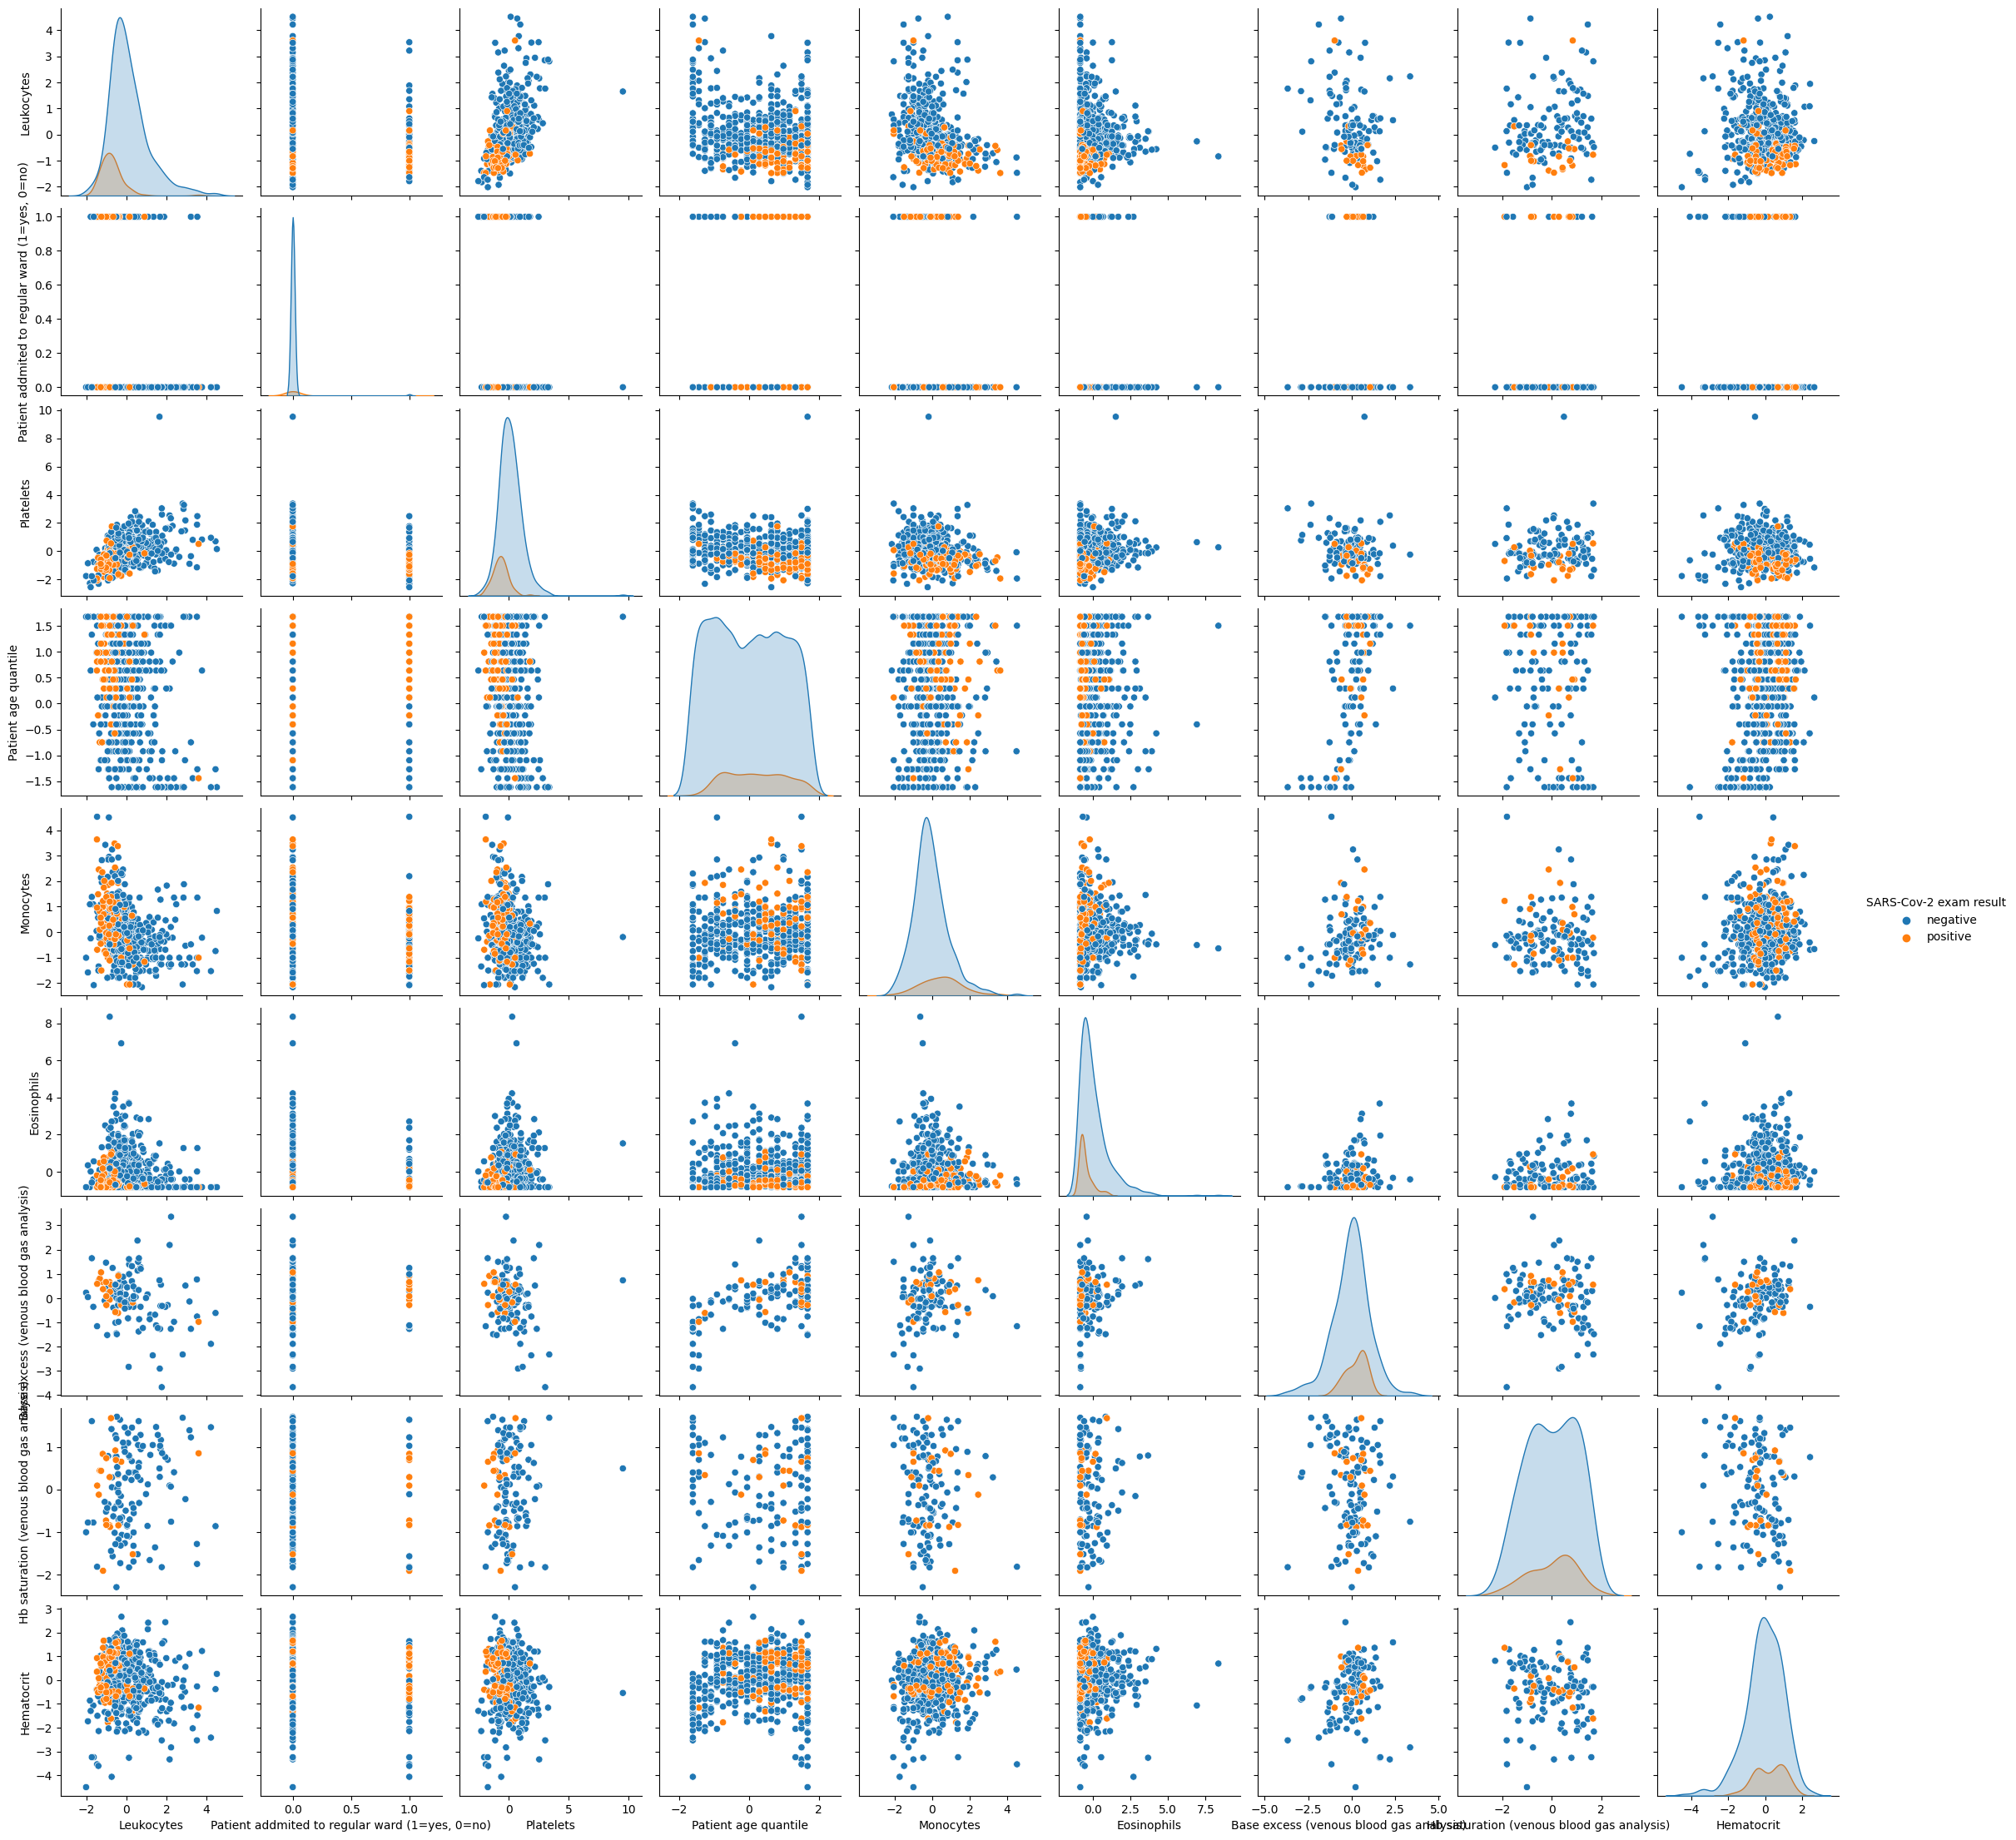

In [47]:
# Scatter plot
cols_of_interest = X.columns[indices[:10]].to_list()
cols_of_interest.append(target)
test = df.loc[:, cols_of_interest]
# print(test.head())
sns.pairplot(test, hue = target)
# plt.xlabel('x')
# plt.ylabel(target)
plt.show()

### Compare Scatter Plot against Target

In [48]:
test2 = test.copy(deep = True)
test2[target] = pd.Series(np.where(test[target].values == 'negative', 0, 1), test.index)

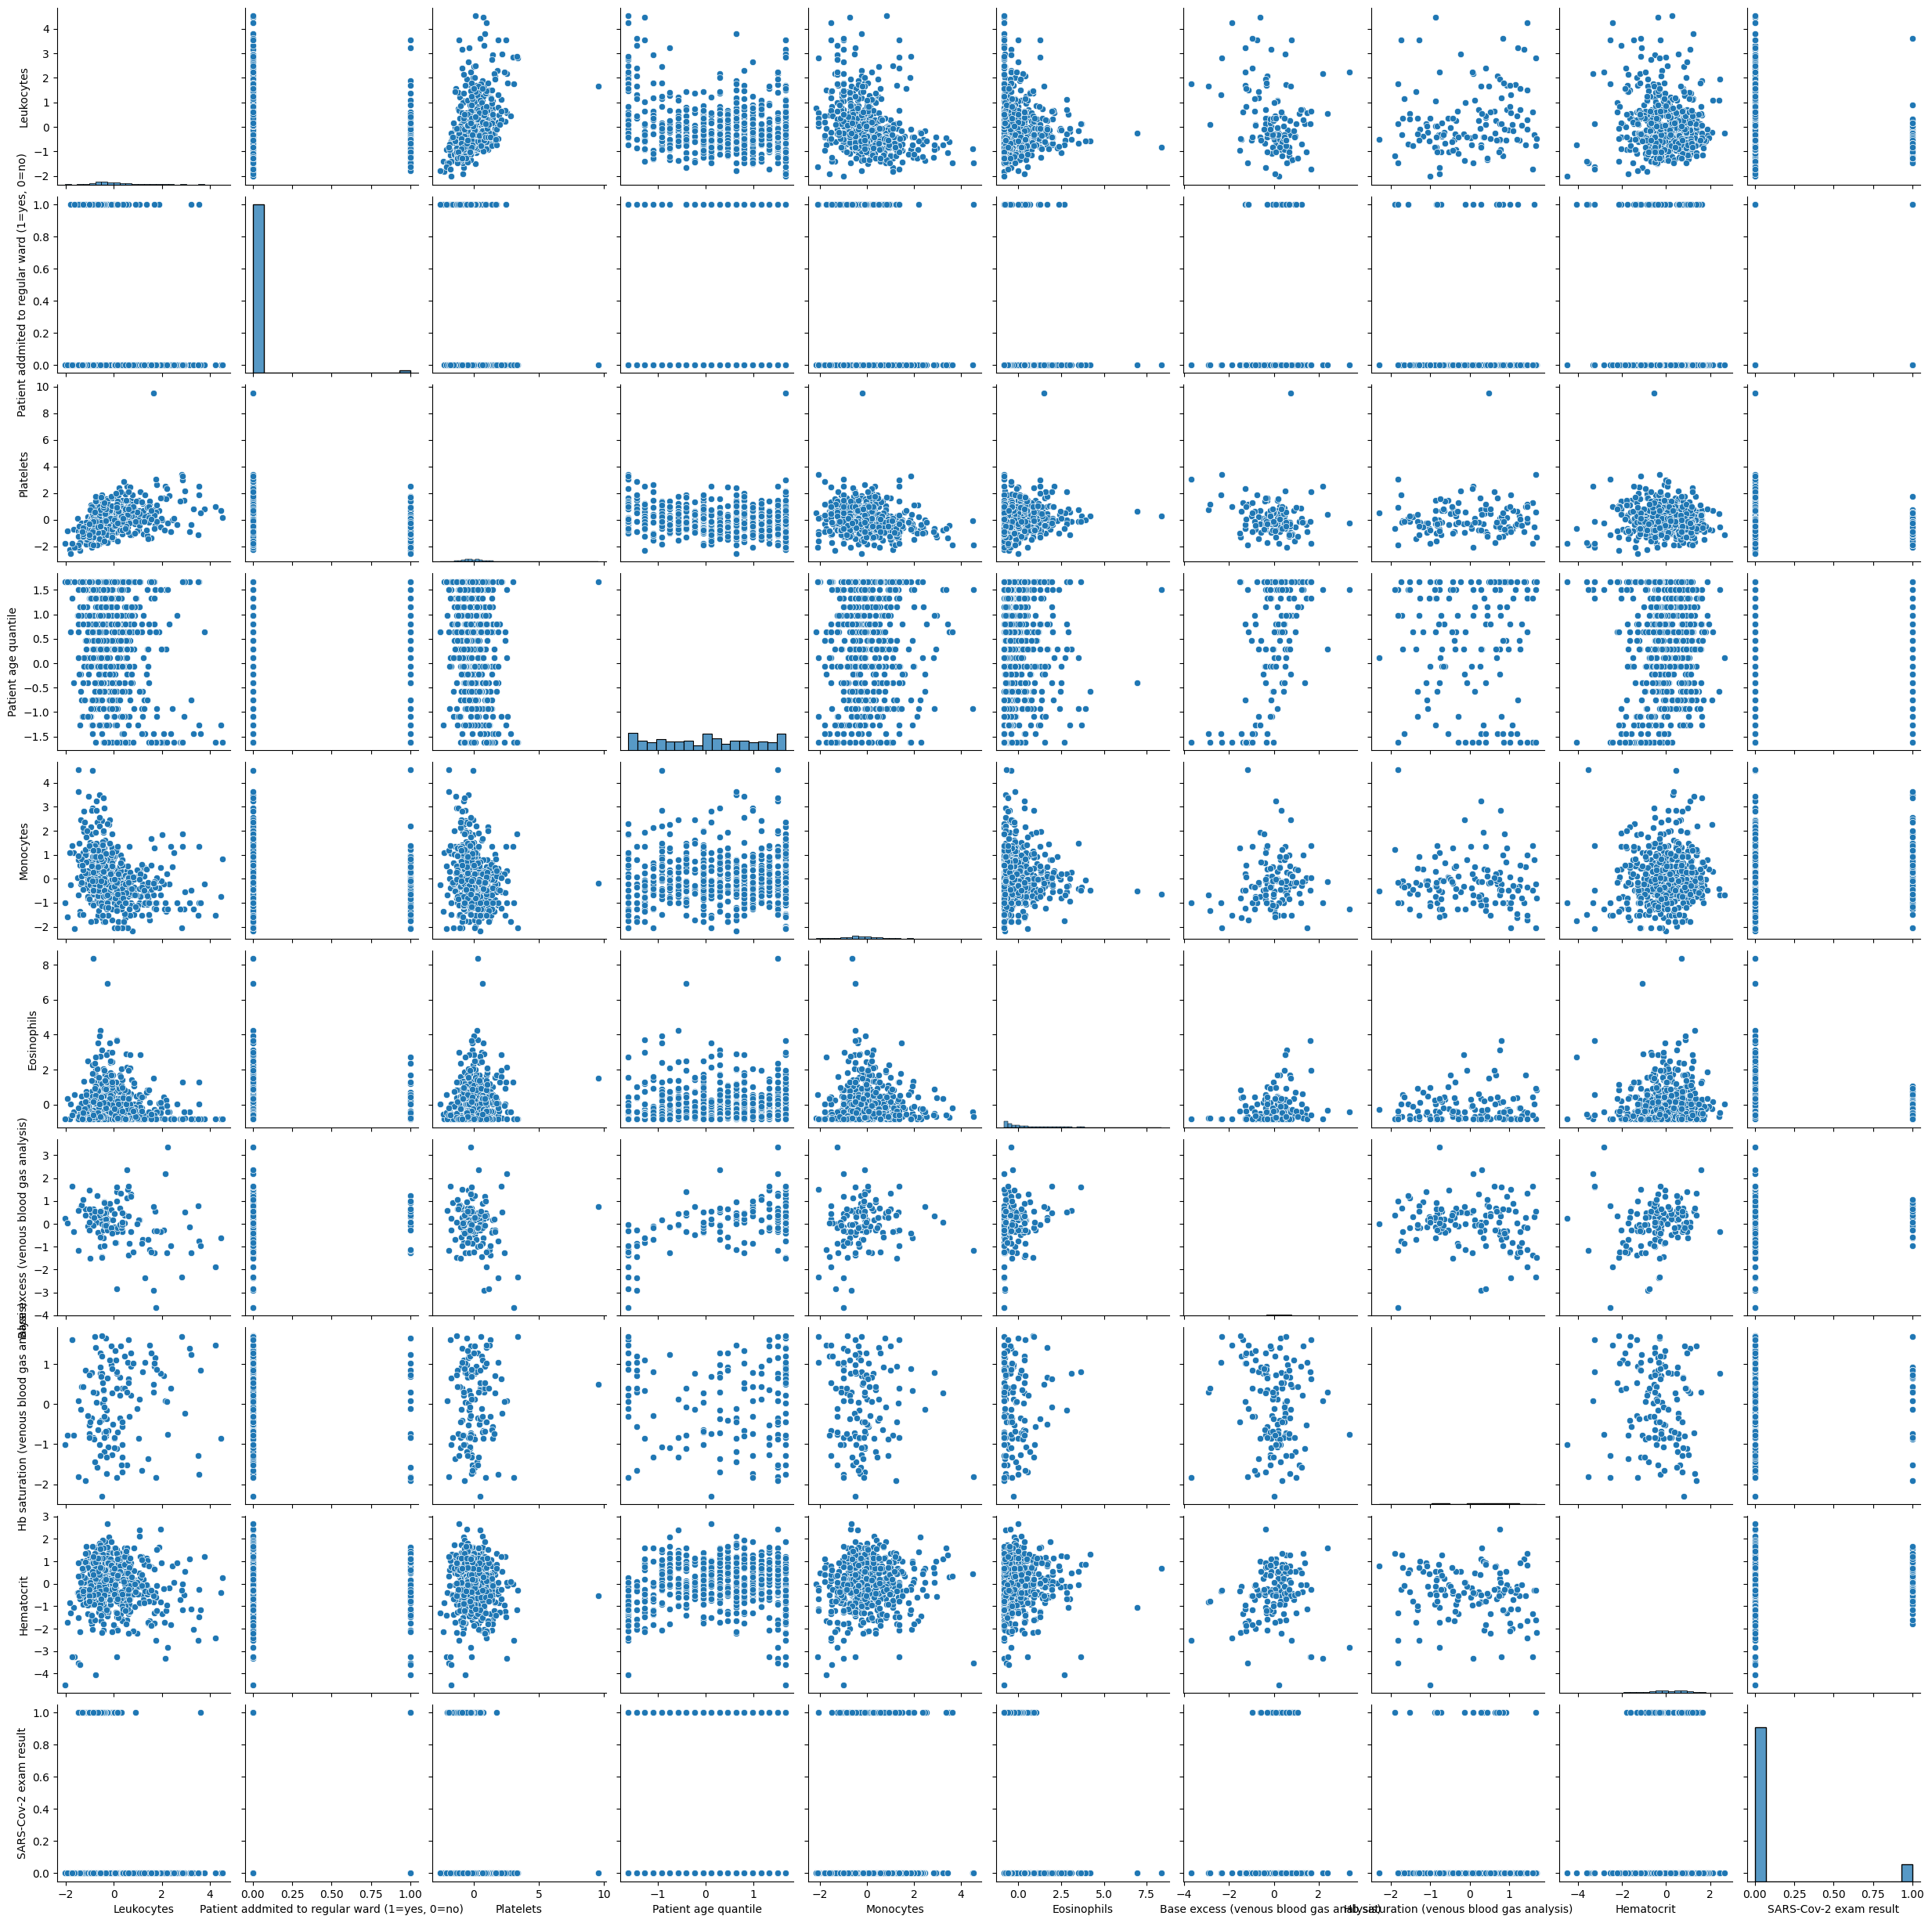

In [49]:
sns.pairplot(test2)
# plt.xlabel('x')
# plt.ylabel(target)
plt.show()

### Drop Columns

In [50]:
drop_cols.extend(['Fio2 (venous blood gas analysis)', 'Myeloblasts', 'Urine - Nitrite'])
print(drop_cols)

['Mycoplasma pneumoniae', 'Urine - Sugar', 'Partial thromboplastin time\xa0(PTT)\xa0', 'Prothrombin time (PT), Activity', 'D-Dimer', 'Fio2 (venous blood gas analysis)', 'Myeloblasts', 'Urine - Nitrite']


In [51]:
df_drop = df.drop(columns = drop_cols)

In [52]:
df_drop[target].replace({'negative': 0, 'positive': 1}, inplace = True)

In [53]:
drop_cols_n = drop_cols + [
    'Urine - Granular cylinders', 
    'Urine - Bile pigments', 
    'Urine - Hyaline cylinders', 
    'Urine - Protein', 
    'Urine - Yeasts', 
    'Urine - Esterase',
    'Urine - Ketone Bodies', 
    'Urine - Urobilinogen',
    # 'Segmented',
    # 'Relationship (Patient/Normal)',
    # 'pO2 (venous blood gas analysis)',
    # 'Myelocytes',
    'Albumin',
    'Vitamin B12'
]
df_drop_n = df.drop(columns = drop_cols_n)
df_drop_n[target].replace({'negative': 0, 'positive': 1}, inplace = True)

In [54]:
cat_drop_cols = list(set(cat_cols) - set(drop_cols_n))
df_cat = df_drop_n[cat_drop_cols].copy()
df_cat['ones'] = 1. # [1. / len(df_cat)] * len(df_cat)
# df_cat.info()

In [55]:
print(len(cat_drop_cols))

26


In [56]:
num_drop_cols = list(set(num_cols) - set(drop_cols_n))
num_drop_cols_target = num_drop_cols + [target]
print(len(num_drop_cols))
df_num = df_drop_n[num_drop_cols_target].copy()

67


### Plot Correlations in Annotated Heatmap

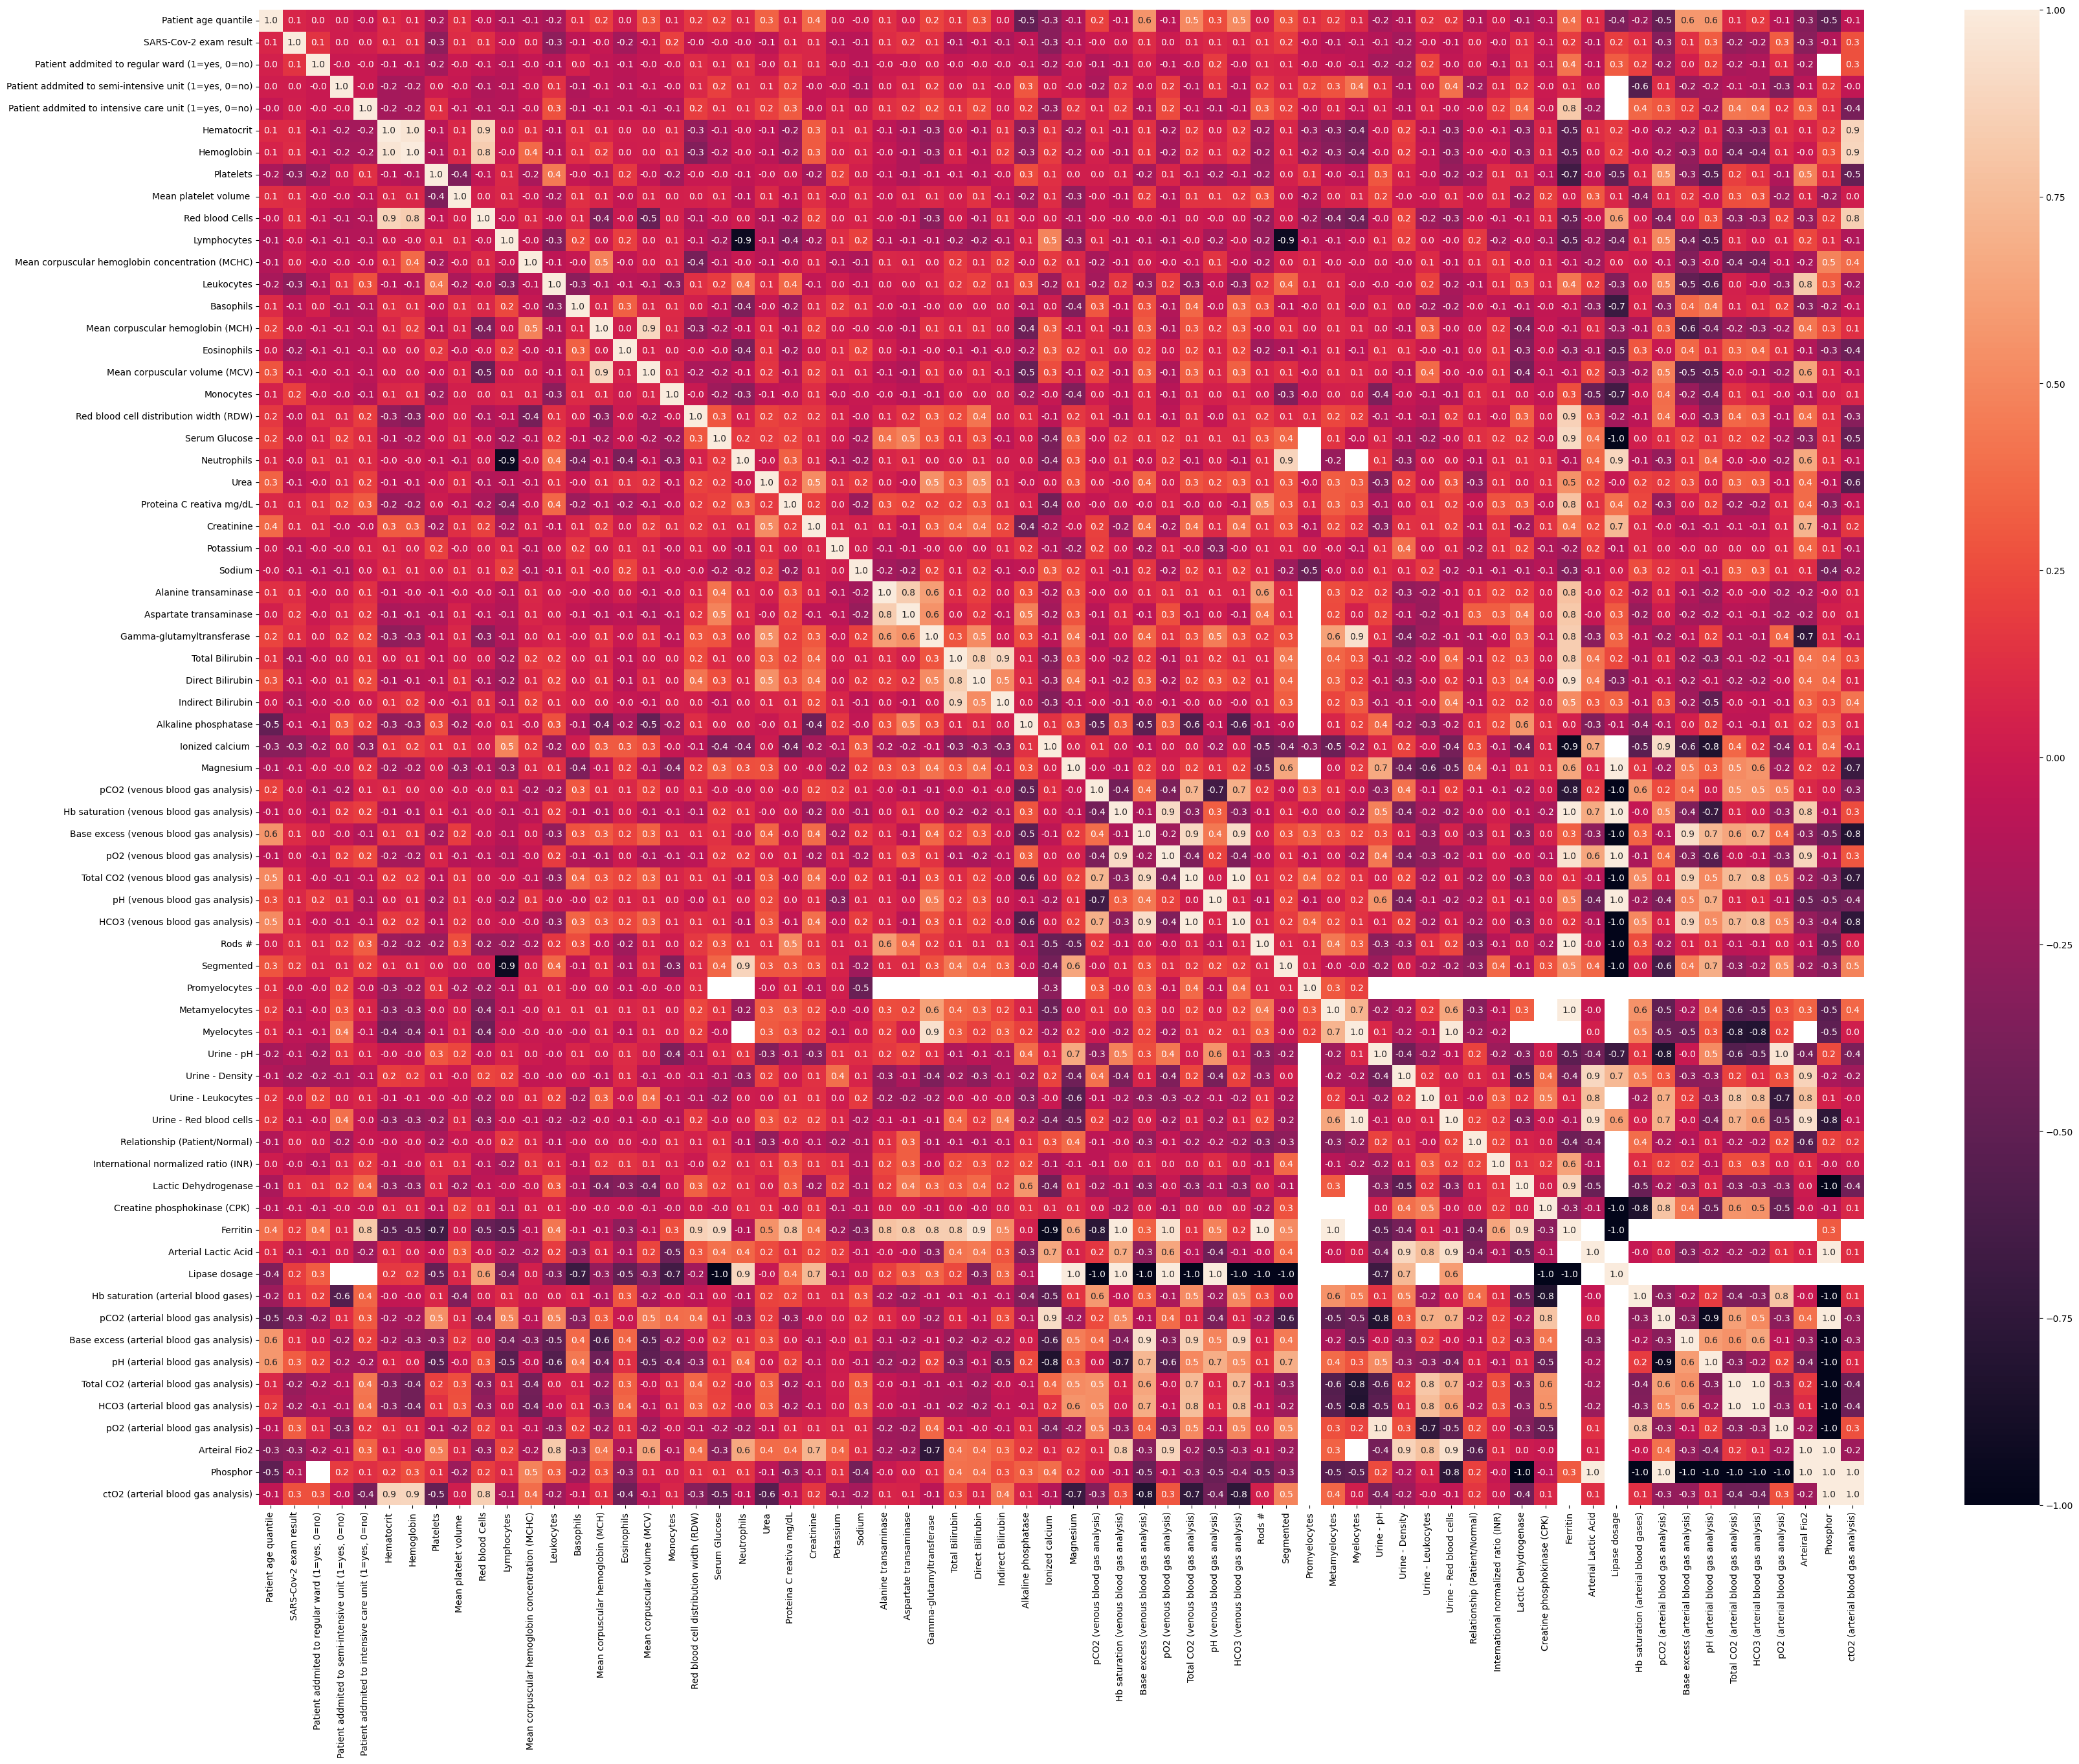

In [57]:
# Check the correlations between numerical features and the target variable with a heatmap
plt.figure(figsize=(40, 30))
sns.heatmap(df_drop_n.corr(numeric_only = True), annot=True, fmt='1.1f')
plt.show()

**Note:** Some features seem to have high correlation with other features, may consider dropping if redundant:
- Neutrophils & Lymphocytes & Segmented
- Lipase dosage
- pH (arterial blood gas analysis)
- Phosphor

### Check Crosstabs for Relationships with Target Feature

In [58]:
# Check the relationships between categorical features and the target variable with crosstabs
for column in df_cat.drop(columns = 'Patient ID').select_dtypes(include=['object']).columns:
    print(pd.crosstab(df_cat[column], df_cat[target]))

SARS-Cov-2 exam result    0    1
Rhinovirus/Enterovirus          
detected                373    6
not_detected            867  106
SARS-Cov-2 exam result   0   1
Urine - Crystals              
Ausentes                53  12
Oxalato de Cálcio +++    1   0
Oxalato de Cálcio -++    1   0
Urato Amorfo +++         1   0
Urato Amorfo --+         2   0
SARS-Cov-2 exam result     0    1
Metapneumovirus                  
detected                  14    0
not_detected            1226  112
SARS-Cov-2 exam result   0   1
Urine - Hemoglobin            
absent                  42  11
present                 15   1
SARS-Cov-2 exam result       0    1
Chlamydophila pneumoniae           
detected                     9    0
not_detected              1231  112
SARS-Cov-2 exam result     0    1
Influenza A                      
detected                  18    0
not_detected            1224  112
SARS-Cov-2 exam result     0    1
Coronavirus HKU1                 
detected                  20    0
not_detec

### Check Chi-Squared Dependencies between pairs of categorical features

In [59]:
for i,col1 in enumerate(df_cat.columns[:-1]):
    for j,col2 in enumerate(df_cat.columns[:-1]):
        if i<j:
            cat_dependencies(df_cat, col1,col2)
    # print("\n")

Reject H0: Rhinovirus/Enterovirus and SARS-Cov-2 exam result are dependent
Reject H0: Rhinovirus/Enterovirus and Influenza B are dependent
Reject H0: Rhinovirus/Enterovirus and Inf A H1N1 2009 are dependent
Reject H0: Influenza A and Influenza A, rapid test are dependent
Reject H0: Influenza A and Inf A H1N1 2009 are dependent
Reject H0: Coronavirus HKU1 and Parainfluenza 4 are dependent
Reject H0: Influenza B, rapid test and Influenza B are dependent
Reject H0: Influenza A, rapid test and Inf A H1N1 2009 are dependent


**Note:** Interesting 'tree' of related features emerges, see accompanying pdf report

### Calculate Pearson and Spearman Correlation Coefficients

In [60]:
df_num[target].replace({'negative': 0, 'positive': 1}, inplace = True)

In [61]:
diffs = [sum(np.diff(df[x].dropna())) for x in num_drop_cols]
new_indices = np.where(np.abs(diffs) < 1.e-12)[0]
bad_cols = np.array(num_drop_cols)[new_indices]
new_num_drop_cols = list(set(num_drop_cols) - set(bad_cols))

In [62]:
# Calculate Pearson and Spearman correlation coefficients for technique 1
# num_cols = df.select_dtypes(include=['float64', 'int64']).columns
# num_drop_cols.remove('SARS-Cov-2 exam result')
num_cols_of_interest = []
correlation_df = pd.DataFrame(columns = ['feature', 'p_corr', 's_corr', 'p_p-value', 's_p-value'])
counter = 0
for col in sorted(num_drop_cols):
    df_temp = df_num.loc[:, [target, col]].copy().dropna(how = 'any')
    # print(df_temp.shape)
    if df_temp.shape[0] > 1:
        print(col)
        pr, pp = pearsonr(df_temp[target].astype(int), df_temp[col])
        # print(f'Pearson correlation between target and {col}: {r:.3f} (p-value: {p:.3f})')
        sr, sp = spearmanr(df_temp[target].astype(int), df_temp[col])
        # print(f'Spearman correlation between target and {col}: {r:.3f} (p-value: {p:.3f})')
        if pp < 0.05:
            print('!!', end = '')
            num_cols_of_interest += [col]
            correlation_df = pd.concat((correlation_df, pd.DataFrame({
                'feature': col,
                'p_corr': pr,
                's_corr': sr,
                'p_p-value': pp,
                's_p-value': sp
            }, index = [counter])))
            counter += 1
        print(f'\tPearson: {pr:.3f}, p-value: {pp:.3f}')
        if sp < 0.05:
            print('!!', end = '')
            if not col in num_cols_of_interest:
                num_cols_of_interest += [col]
                correlation_df = pd.concat((correlation_df, pd.DataFrame({
                    'feature': col,
                    'p_corr': pr,
                    's_corr': sr,
                    'p_p-value': pp,
                    's_p-value': sp
                }, index = [counter])))
                counter += 1
        print(f'\tSpearman: {sr:.3f}, p-value: {sp:.3f}')

Alanine transaminase
	Pearson: 0.114, p-value: 0.089
	Spearman: 0.092, p-value: 0.168
Alkaline phosphatase
	Pearson: -0.063, p-value: 0.452
	Spearman: -0.057, p-value: 0.494
Arteiral Fio2
	Pearson: -0.311, p-value: 0.183
	Spearman: -0.216, p-value: 0.359
Arterial Lactic Acid
	Pearson: -0.121, p-value: 0.547
	Spearman: -0.344, p-value: 0.079
Aspartate transaminase
!!	Pearson: 0.151, p-value: 0.023
!!	Spearman: 0.164, p-value: 0.013
Base excess (arterial blood gas analysis)
	Pearson: 0.131, p-value: 0.516
	Spearman: 0.014, p-value: 0.944
Base excess (venous blood gas analysis)
	Pearson: 0.103, p-value: 0.233
	Spearman: 0.139, p-value: 0.108
Basophils
	Pearson: -0.063, p-value: 0.123
	Spearman: -0.057, p-value: 0.162
Creatine phosphokinase (CPK) 
	Pearson: -0.051, p-value: 0.609
	Spearman: -0.027, p-value: 0.785
Creatinine
	Pearson: 0.082, p-value: 0.093
!!	Spearman: 0.112, p-value: 0.021
Direct Bilirubin
	Pearson: -0.071, p-value: 0.338
	Spearman: -0.033, p-value: 0.657
Eosinophils
!!	Pe

In [63]:
print("Numerical Features of Interest from Correlation:")
for col in num_cols_of_interest:
    print('\t' + col)

Numerical Features of Interest from Correlation:
	Aspartate transaminase
	Creatinine
	Eosinophils
	Gamma-glutamyltransferase 
	Hematocrit
	Hemoglobin
	Ionized calcium 
	Leukocytes
	Mean platelet volume 
	Monocytes
	Patient addmited to intensive care unit (1=yes, 0=no)
	Patient addmited to regular ward (1=yes, 0=no)
	Patient age quantile
	Platelets
	Proteina C reativa mg/dL
	Red blood Cells


In [64]:
correlation_df.loc[:, ['feature', 'p_corr', 'p_p-value']].sort_values('p_p-value')

feature    p_corr     p_p-value
11     Patient addmited to regular ward (1=yes, 0=no)  0.142437  5.715650e-27
7                                          Leukocytes -0.288508  5.273455e-13
13                                          Platelets -0.282268  1.723391e-12
12                               Patient age quantile  0.075244  1.517025e-08
9                                           Monocytes  0.197333  1.084596e-06
2                                         Eosinophils -0.192609  1.930012e-06
15                                    Red blood Cells  0.121320  2.868421e-03
8                               Mean platelet volume   0.108836  7.674271e-03
5                                          Hemoglobin  0.104775  1.003494e-02
4                                          Hematocrit  0.099120  1.489444e-02
0                              Aspartate transaminase  0.151410  2.280361e-02
6                                    Ionized calcium  -0.305113  3.119535e-02
10  Patient addmited to intensive care unit (1=yes...  0.027586  3.822946e-02
1                                          Creatinine  0.081675  9.303056e-02
3                          Gamma-glutamyltransferase   0.132165  1.034114e-01
14                           Proteina C reativa mg/dL  0.071972  1.058644e-01

In [65]:
for x in correlation_df.loc[:, ['feature', 'p_p-value']].sort_values('p_p-value').drop(columns = 'p_p-value').values.reshape((1, 16)).tolist()[0]:
    print(x)

Patient addmited to regular ward (1=yes, 0=no)
Leukocytes
Platelets
Patient age quantile
Monocytes
Eosinophils
Red blood Cells
Mean platelet volume 
Hemoglobin
Hematocrit
Aspartate transaminase
Ionized calcium 
Patient addmited to intensive care unit (1=yes, 0=no)
Creatinine
Gamma-glutamyltransferase 
Proteina C reativa mg/dL


In [66]:
correlation_df.loc[:, ['feature', 's_corr', 's_p-value']].sort_values('s_p-value')

feature    s_corr     s_p-value
11     Patient addmited to regular ward (1=yes, 0=no)  0.142437  5.715650e-27
7                                          Leukocytes -0.373222  2.470423e-21
13                                          Platelets -0.328423  1.318546e-16
2                                         Eosinophils -0.241621  1.910620e-09
12                               Patient age quantile  0.076606  8.295371e-09
9                                           Monocytes  0.197195  1.103843e-06
14                           Proteina C reativa mg/dL  0.165020  1.926727e-04
8                               Mean platelet volume   0.117938  3.845839e-03
3                          Gamma-glutamyltransferase   0.213302  8.113789e-03
15                                    Red blood Cells  0.105608  9.513331e-03
6                                    Ionized calcium  -0.348719  1.306838e-02
0                              Aspartate transaminase  0.164196  1.345405e-02
5                                          Hemoglobin  0.099174  1.483976e-02
4                                          Hematocrit  0.094506  2.028257e-02
1                                          Creatinine  0.112085  2.097537e-02
10  Patient addmited to intensive care unit (1=yes...  0.027586  3.822946e-02

In [67]:
for x in correlation_df.loc[:, ['feature', 's_p-value']].sort_values('s_p-value').drop(columns = 's_p-value').values.reshape((1, 16)).tolist()[0]:
    print(x)

Patient addmited to regular ward (1=yes, 0=no)
Leukocytes
Platelets
Eosinophils
Patient age quantile
Monocytes
Proteina C reativa mg/dL
Mean platelet volume 
Gamma-glutamyltransferase 
Red blood Cells
Ionized calcium 
Aspartate transaminase
Hemoglobin
Hematocrit
Creatinine
Patient addmited to intensive care unit (1=yes, 0=no)


### Use ANOVA to Obtain Relative Feature Importance for Numerical cols

In [68]:
y.replace({'negative': 0, 'positive': 1}, inplace = True)
df[target].replace({'negative': 0, 'positive': 1}, inplace = True)

In [69]:
# ANOVA
results = pd.DataFrame(columns = ['prob'])
for col in num_drop_cols:
    # print(col)
    X = df_num.loc[:, [col, target]].dropna(how = 'any')
    y = np.array(X[target])
    X = sm.add_constant(X.drop(columns = target))
    # print(type(X), type(y))
    model = sm.OLS(y, np.array(X))
    fitted_model = model.fit()
    results = pd.concat((results, pd.DataFrame({
        'prob': fitted_model.f_pvalue
    }, index = [col])))

In [70]:
ANOVA_cols_of_interest = results[results['prob'] < 0.05].sort_values('prob').index
for col in ANOVA_cols_of_interest:
    print(col, results.loc[col, 'prob'])

Patient addmited to regular ward (1=yes, 0=no) 5.715649980391544e-27
Leukocytes 5.273455451675773e-13
Platelets 1.7233912223533259e-12
Patient age quantile 1.5170245313553222e-08
Monocytes 1.0845961071419866e-06
Eosinophils 1.930011780305308e-06
Red blood Cells 0.002868420517839233
Mean platelet volume  0.007674271181454441
Hemoglobin 0.010034941298429766
Hematocrit 0.014894440036738918
Aspartate transaminase 0.02280360815286936
Ionized calcium  0.031195348620869652
Patient addmited to intensive care unit (1=yes, 0=no) 0.03822945924911736


**Observations:**
- Accoring to the ANOVA analysis there are 13 statistically significant features with respect to the target variable, namely:
    1. Patient addmited to regular ward (1=yes, 0=no)
    2. Leukocytes
    3. Platelets
    4. Patient age quantile
    5. Monocytes 
    6. Eosinophils 
    7. Red blood Cells 
    8. Mean platelet volume 
    9. Hemoglobin 
    10. Hematocrit 
    11. Aspartate transaminase 
    12. Ionized calcium 
    13. Patient addmited to intensive care unit (1=yes, 0=no) 

In [71]:
print(f"Number of categorical columns: {len(cat_drop_cols)}")
print(f"Number of numerical columns: {len(num_drop_cols)} or {len(new_num_drop_cols)}")

Number of categorical columns: 26
Number of numerical columns: 67 or 58


# Final Data Cleanup (Future Milestone Work)

## Milestone 2:

Scoring guide (Rubric) - Capstone Notes - 2 

Criteria:
- Data pre-processing (4 points)
    - Removal of unwanted variables - Missing Value treatment - Outlier treatment - Variable transformation - Addition of new variables

- Exploratory Data Analysis (4 points)
    - Relationship among variables, important variables - Insightful Visualizations

- Analytical approach (2 points)
    - mention the alternate analytical approaches that they may see fit to be applied to the problem

Total Points: 10

### Perform Final Data Pre-Processing

In [72]:
XF = df_drop_n.drop(columns = [target, 'Patient ID'], axis=1)
yF = df[target]
X_encoded = pd.get_dummies(XF, drop_first = True)
X_encoded_cols = X_encoded.columns

In [73]:
X_encoded.head()

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
0              0.637244                                               0   
1              1.329598                                               0   
2             -0.228198                                               0   
3             -0.747464                                               0   
4              0.983421                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   ...  Urine - Aspect_cloudy  Urine - Aspect_lightly_cloudy  \
0  ...                      0                              0   
1  ...                      0                              0   
2  ...                      0                              0   
3  ...                      0                              0   
4  ...                      0                              0   

   Urine - Hemoglobin_present  Urine - Crystals_Oxalato de Cálcio +++  \
0                           0                                       0   
1                           0                                       0   
2                           0                                       0   
3                           0                                       0   
4                           0                                       0   

   Urine - Crystals_Oxalato de Cálcio -++  Urine - Crystals_Urato Amorfo +++  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   Urine - Crystals_Urato Amorfo --+  Urine - Color_light_yellow  \
0                                  0                           0   
1                                  0                           0   
2                                  0                           0   
3                                  0                           0   
4                                  0                           0   

   Urine - Color_orange  Urine - Color_yellow  
0                     0                     0  
1                     0                     0  
2                     0                     0  
3                     0                     0  
4                     0                     0  

[5 rows x 97 columns]

In [74]:
knn_imputer = KNNImputer()
X_imputed = pd.DataFrame(knn_imputer.fit_transform(X_encoded), columns = X_encoded_cols)

In [75]:
X_imputed.head()

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
0              0.637244                                             0.0   
1              1.329598                                             0.0   
2             -0.228198                                             0.0   
3             -0.747464                                             0.0   
4              0.983421                                             0.0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                0.0        0.177005   
1                                                0.0        0.236515   
2                                                0.0       -0.088502   
3                                                0.0        0.492867   
4                                                0.0       -0.056459   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0    0.153097  -0.957076               0.818467        -0.197712     0.412185   
1   -0.022340  -0.517413               0.010677         0.102004     0.318366   
2   -0.122590  -0.024990               0.324817        -0.046091     0.451419   
3    0.616751   0.608125               0.077992         0.623863     0.187018   
4   -0.084996   0.482507              -0.527851        -0.127190     0.178489   

   ...  Urine - Aspect_cloudy  Urine - Aspect_lightly_cloudy  \
0  ...                    0.0                            0.0   
1  ...                    0.0                            0.0   
2  ...                    0.0                            0.0   
3  ...                    0.0                            0.0   
4  ...                    0.0                            0.0   

   Urine - Hemoglobin_present  Urine - Crystals_Oxalato de Cálcio +++  \
0                         0.0                                     0.0   
1                         0.0                                     0.0   
2                         0.0                                     0.0   
3                         0.0                                     0.0   
4                         0.0                                     0.0   

   Urine - Crystals_Oxalato de Cálcio -++  Urine - Crystals_Urato Amorfo +++  \
0                                     0.0                                0.0   
1                                     0.0                                0.0   
2                                     0.0                                0.0   
3                                     0.0                                0.0   
4                                     0.0                                0.0   

   Urine - Crystals_Urato Amorfo --+  Urine - Color_light_yellow  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                0.0                         0.0   

   Urine - Color_orange  Urine - Color_yellow  
0                   0.0                   0.0  
1                   0.0                   0.0  
2                   0.0                   0.0  
3                   0.0                   0.0  
4                   0.0                   0.0  

[5 rows x 97 columns]

In [76]:
dfF = pd.concat([X_imputed, yF], axis = 1)
dfF.head()

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
0              0.637244                                             0.0   
1              1.329598                                             0.0   
2             -0.228198                                             0.0   
3             -0.747464                                             0.0   
4              0.983421                                             0.0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                0.0        0.177005   
1                                                0.0        0.236515   
2                                                0.0       -0.088502   
3                                                0.0        0.492867   
4                                                0.0       -0.056459   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0    0.153097  -0.957076               0.818467        -0.197712     0.412185   
1   -0.022340  -0.517413               0.010677         0.102004     0.318366   
2   -0.122590  -0.024990               0.324817        -0.046091     0.451419   
3    0.616751   0.608125               0.077992         0.623863     0.187018   
4   -0.084996   0.482507              -0.527851        -0.127190     0.178489   

   ...  Urine - Aspect_lightly_cloudy  Urine - Hemoglobin_present  \
0  ...                            0.0                         0.0   
1  ...                            0.0                         0.0   
2  ...                            0.0                         0.0   
3  ...                            0.0                         0.0   
4  ...                            0.0                         0.0   

   Urine - Crystals_Oxalato de Cálcio +++  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   Urine - Crystals_Oxalato de Cálcio -++  Urine - Crystals_Urato Amorfo +++  \
0                                     0.0                                0.0   
1                                     0.0                                0.0   
2                                     0.0                                0.0   
3                                     0.0                                0.0   
4                                     0.0                                0.0   

   Urine - Crystals_Urato Amorfo --+  Urine - Color_light_yellow  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                0.0                         0.0   

   Urine - Color_orange  Urine - Color_yellow  SARS-Cov-2 exam result  
0                   0.0                   0.0                       0  
1                   0.0                   0.0                       0  
2                   0.0                   0.0                       0  
3                   0.0                   0.0                       0  
4                   0.0                   0.0                       0  

[5 rows x 98 columns]

## Address Data Imbalance

### Visualize the Data Imbalance

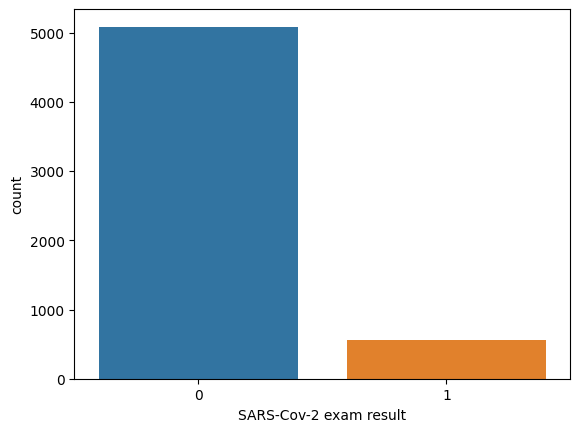

Max Value: 5086 
Min Value: 558
(5086, 98) (558, 98)
Ratio of class 1 to class 0: 0.11


In [77]:
target = 'SARS-Cov-2 exam result'

class0 = 0
class1 = 1

sns.countplot(dfF, x = target)
plt.show()

cl0 = yF.value_counts()[0]
cl1 = yF.value_counts()[1]
clMin = min([cl0, cl1])
clMax = max([cl0, cl1])

df0 = dfF.loc[yF == class0]
df1 = dfF.loc[yF == class1]

print(f"Max Value: {clMax} \nMin Value: {clMin}")
print(df0.shape, df1.shape)
print(f"Ratio of class 1 to class 0: {cl1/cl0:.2f}")

**Observations:**
- The dataset is strongly imbalanced. This can be addressed through one or a combination of several methods:
    1. The dataset can be resampled
        - undersampling
        - oversampling
        - SMOTE resampling
    2. The ROC-AUC score can be used to determine an adjusted binary classification threshold for output classes after testing
    3. Some machine learning models can account for the data imbalance natively, and therefore do not require resampling:
        - Decision tree
        - Boosted decision tree
        - XGBoost
        - AdaBoost
    4. Considering alternative metrics instead of accuracy (precision, recall, $F_1$-score, $F_\beta$ score, etc.)

### Undersampling

(1116, 98)


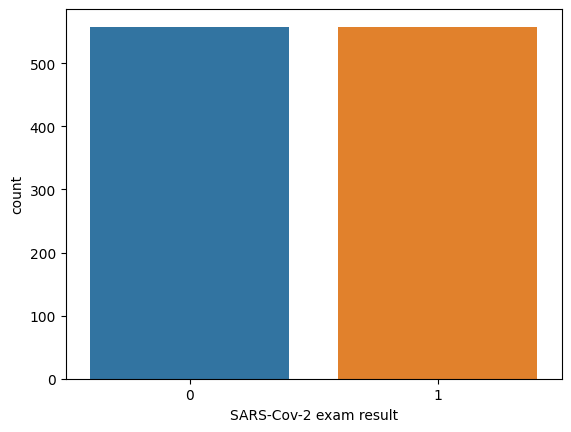

1    558
0    558
Name: SARS-Cov-2 exam result, dtype: int64

In [78]:
df0s = df0.sample(n = clMin)
dfU = pd.concat([df0s, df1], ignore_index = True).sample(frac=1, random_state=42).reset_index(drop = True)
print(dfU.shape)

sns.countplot(data = dfU, x = target)
plt.show()

dfU[target].value_counts()

### Oversampling

(10172, 98)


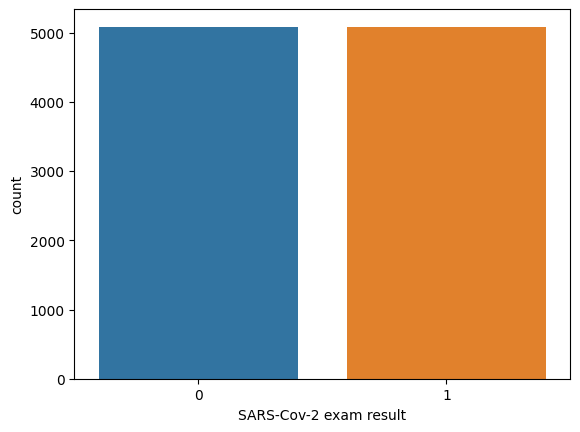

1    5086
0    5086
Name: SARS-Cov-2 exam result, dtype: int64

In [79]:
df1s = df1.sample(n=clMax, replace = True)
dfO = pd.concat([df0, df1s], ignore_index = True).sample(frac=1, random_state=1).reset_index(drop = True)
print(dfO.shape)

sns.countplot(data = dfO, x = target)
plt.show()

dfO[target].value_counts()

### SMOTE Resampling

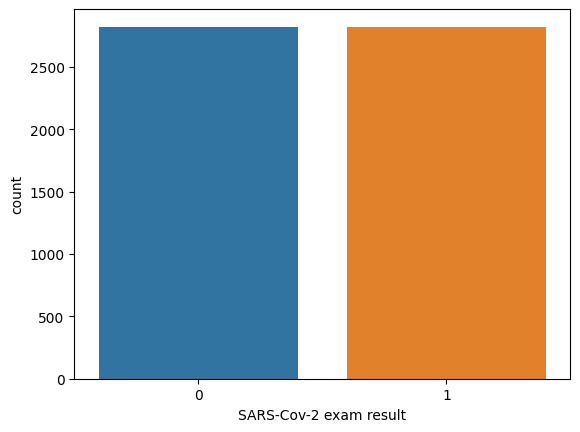

In [80]:
over = SMOTE(sampling_strategy = (clMax+clMin)/2./clMax)
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_res2, y_res2 = pipeline.fit_resample(X_imputed, yF)
dfS = pd.concat([X_res2, y_res2], axis = 1).sample(frac=1, random_state=1).reset_index(drop = True)

sns.countplot(data = dfS, x = target)
plt.show()

# Save Cleaned Datasets

In [81]:
with open('/home/peacelovephysics/UT AI Course/capstone_project/covid19_dataset_cleaned_N.csv', 'w') as no_rescale_file:
    dfF.to_csv(no_rescale_file, index = False)
    
with open('/home/peacelovephysics/UT AI Course/capstone_project/covid19_dataset_cleaned_U.csv', 'w') as under_file:
    dfU.to_csv(under_file, index = False)
    
with open('/home/peacelovephysics/UT AI Course/capstone_project/covid19_dataset_cleaned_O.csv', 'w') as over_file:
    dfO.to_csv(over_file, index = False)
    
with open('/home/peacelovephysics/UT AI Course/capstone_project/covid19_dataset_cleaned_S.csv', 'w') as smote_file:
    dfS.to_csv(smote_file, index = False)

# Report Overall Run Time

In [82]:
run_time_reporter(start_time)

Run time: 59.3 s
